# Interactive Plotting

To get started, please install `ipywidgets`. You can do so using:

```
conda install ipywidgets
```


## Getting Started

Let's import the usual suspects: `pandas`, `matplotlib`, `numpy`, and `ipywidgets`.

Gensim is a very powerful module for performing all sorts of natural language processing. It has become the default for word embedding (word vector) models like word2vec and doc2vec. Because `gensim` is very large, we won't import the whole thing. We'll only import the parts that we're going to need.

For many problems, you may want to refer to the Gensim documentation. This page will be particularly helpful: https://radimrehurek.com/gensim/models/ldamodel.html

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Example 1

Let's first interact with a dataframe. We'll use the Twitter dataset for this. 

In [2]:
docs = pd.read_csv("twitter.csv")
print(docs.head())
print(docs.info())

   Topic Sentiment             TweetId                       TweetDate  \
0  apple  positive  126415614616154112  Tue Oct 18 21:53:25 +0000 2011   
1  apple  positive  126404574230740992  Tue Oct 18 21:09:33 +0000 2011   
2  apple  positive  126402758403305474  Tue Oct 18 21:02:20 +0000 2011   
3  apple  positive  126397179614068736  Tue Oct 18 20:40:10 +0000 2011   
4  apple  positive  126395626979196928  Tue Oct 18 20:34:00 +0000 2011   

                                           TweetText  
0  Now all @Apple has to do is get swype on the i...  
1  @Apple will be adding more carrier support to ...  
2  Hilarious @youtube video - guy does a duet wit...  
3  @RIM you made it too easy for me to switch to ...  
4  I just realized that the reason I got into twi...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 5 columns):
Topic        5113 non-null object
Sentiment    5113 non-null object
TweetId      5113 non-null int64
TweetDate    5113 

Let's make a function that randomly samples a tweet given the Topic and Sentiment.

In [3]:
def get_tweet(df, topic, sentiment):
    ## Sample a row based on our conditions
    row = df.loc[(df["Sentiment"]==sentiment) & (df["Topic"]==topic),"TweetText"].sample(n=1)
    ## Get the tweet text out of the row we've returned
    tweet = row.iloc[0]
    ## Print the tweet
    print(tweet)
    
get_tweet(docs, "apple","positive")

@apple iOS 5 upgrade done ...... Much better feature..... Few more feature required


Now, let's make this function interactive! First, we need to know the possible options for sentiment and topic. We can get these from the dataframe itself.

In [4]:
sentiment_options = docs["Sentiment"].unique()
topic_options = docs["Topic"].unique()
print(topic_options)

['apple' 'google' 'microsoft' 'twitter']


Now, let's make a new function that is interactive and calls our `get_tweet()` function. The user should choose from a list for sentiment and also choose from a list for topic. The `@interact` command will help make this very easy. `@interact` is what we call "syntactic sugar" because it makes our code look sweet. It turns any function into an interactive function! A helpful guide can be found here: https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

Check out the example below. When you run this block of code, it should give you a set of interactive widgets below.

In [5]:
@interact
def sample_tweets(chosen_sentiment = sentiment_options,
                  chosen_topic = topic_options):
    get_tweet(docs, chosen_topic, chosen_sentiment)
    

interactive(children=(Dropdown(description='chosen_sentiment', options=('positive', 'negative', 'neutral', 'ir…

Let's break down what is happening. The `@interact` is telling Python (ipywidgets) to interpret the function below as interactive. `@interact` magically knows that if an argument is given a list in your function definition, it should treat that list as set of options for the user (for example: `chosen_sentiment = sentiment_options` where `sentiment_options` is a list). Every time the user interacts with the function by changing an option, the function is run again with the new values that the user has selected.

Once the user selects values for `chosen_sentiment` and `chosen_topic`, our function simply calls the `get_tweet()` function that we defined above. It passes the `docs` dataframe with our tweets in it and the chosen values for sentiment and topic. Then, `get_tweet()` handles the rest. 

## Example 2

Sweet. Let's try it with plotting now. We can adjust all of the parameters of our plots this way. Let's try this with `iris.csv` since it makes life so easy.

In [6]:
iris = pd.read_csv("iris.csv")

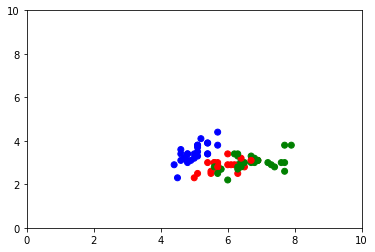

In [7]:
def plot_iris(df, x, y, versicolor_color, virginica_color, setosa_color, xlim=None, ylim=None):
    ## Start a new figure
    fig, ax = plt.subplots()
    ## Define a dictionary that maps species to the chosen color
    colors = {'versicolor':versicolor_color, 'virginica':virginica_color, 'setosa':setosa_color}
    ## Plot the scatterplot of x variable, y variable, and species by color
    ax.scatter(df[x], df[y], c=df['Species'].apply(lambda x: colors[x]))
    ## Set the X and Y axis limits
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    ## Show the plot
    plt.show()
    
plot_iris(iris,"SepalLength","SepalWidth","red","green","blue",(0,10),(0,10))

The function above, `plot_iris`, allows the user to specify which variables from the iris dataset will be plotted, the colors for each species, and the x and y limits for the axes. X and Y limits should be specified as tuples (xmin,xmax). Colors must be value colors in Python. Python includes several named colors.

The below code should launch an interactive version of the function above.

In [8]:
xlim_slider = widgets.FloatRangeSlider(min=0,max=10,step=0.5)
ylim_slider = widgets.FloatRangeSlider(min=0,max=10,step=0.5)

@interact
def interactive_iris(x=["SepalLength","SepalWidth","PetalLength","PetalWidth"],
                     y=["SepalLength","SepalWidth","PetalLength","PetalWidth"],
                     versicolor_color=["red","green","blue","yellow","orange","purple","black"],
                     virginica_color=["red","green","blue","yellow","orange","purple","black"],
                     setosa_color=["red","green","blue","yellow","orange","purple","black"],
                     xlim=xlim_slider,
                     ylim=ylim_slider):
    plot_iris(iris,x,y,versicolor_color,virginica_color,setosa_color,xlim,ylim)


interactive(children=(Dropdown(description='x', options=('SepalLength', 'SepalWidth', 'PetalLength', 'PetalWid…

## Example 3

It turns out, we can write interactive functions to control all sorts of things in Python, not just plots! So, let's write a function that uses Random Forests to classify irises. The user can select some model parameters and then see how the performance is affected.

First, let's print the true classifications for reference.

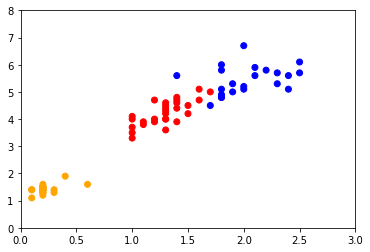

In [9]:
iris_test = pd.read_csv("iris_test.csv")

plot_iris(iris_test,"PetalWidth","PetalLength","red","blue","orange",(0,3),(0,8))

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features_selection = widgets.SelectMultiple(
    options=['PetalLength',"PetalWidth","SepalLength","SepalWidth"],
    value=['PetalLength',"PetalWidth"],
    description='Features',
    disabled=False
)

@interact
def estimate_random_forest(features=features_selection,
                           n_estimators=(1,10,1), 
                           max_depth=(1,10,1),  
                           max_samples=(1,50,5), 
                           max_leaf_nodes=(2,10,1),
                           xaxis=['PetalLength',"PetalWidth","SepalLength","SepalWidth"],
                           yaxis=['PetalWidth',"PetalLength","SepalLength","SepalWidth"],
                           show_true=False):
    ## Initialize a model with our chosen hyperparameters
    rf_model = RandomForestClassifier(n_estimators=n_estimators, 
                                      max_depth=max_depth, 
                                      max_samples=max_samples,
                                      max_leaf_nodes=max_leaf_nodes,
                                      random_state=1234, class_weight="balanced")
    ## Fit the model to the training data
    rf_model.fit(iris[list(features)], iris["Species"])
    ## Make predictions for the test data
    predictions = rf_model.predict(iris_test[list(features)])
    ## Make a new test set copy
    iris_predicted = iris_test.copy()
    ## Should we replace the true values with our predictions?
    if show_true is False:
        iris_predicted["Species"] = predictions
    ## Plot the results
    plot_iris(iris_predicted,xaxis,yaxis,"red","blue","orange",None,None)
    


interactive(children=(SelectMultiple(description='Features', index=(0, 1), options=('PetalLength', 'PetalWidth…

Every time you adjust a slider, an entire new random forest model is being estimated. Because of some tricky programming from our `plot_iris` function, the x and y axis limits should adjust automatically based on the features you pick. You can select one or more features on which to run the random forest.

## Problem 1

Alright. Your turn! Make a cool interactive plot or function. Exactly what this should look like is up to you. If you need some ideas, check out the following resources:

* Basic tutorial for @interact: https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
* All available widget controls: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Selection-widgets
* Simple intro to ipywidgets: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html
* Examples of non-interactive plots (matplotlib) for inspiration: https://matplotlib.org/3.1.1/gallery/index.html

In [11]:
# Retrieve RNA-Seq data
RNA_Seq_Counts = pd.read_csv("nc101_scaff_dataCounts.txt.html", sep="\t", index_col=0)

# Print dataframe info
print(RNA_Seq_Counts.info())

# Display first five rows of dataframe
print(RNA_Seq_Counts.head())

# Store row name indexes within an array
geneNameIndexes = np.array(RNA_Seq_Counts.index)
print("Number of genes are ", geneNameIndexes.shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 4631 entries, NC101_00003 to NC101_04685
Data columns (total 11 columns):
D2_01     4631 non-null int64
D2_02     4631 non-null int64
D2_03     4631 non-null int64
W12_01    4631 non-null int64
W12_02    4631 non-null int64
W12_03    4631 non-null int64
w20_01    4631 non-null int64
w20_02    4631 non-null int64
w20_03    4631 non-null int64
w20_04    4631 non-null int64
w20_05    4631 non-null int64
dtypes: int64(11)
memory usage: 434.2+ KB
None
             D2_01  D2_02  D2_03  W12_01  W12_02  W12_03  w20_01  w20_02  \
nc101_code                                                                 
NC101_00003    329     29     40      97     423     141     469     342   
NC101_00004     30      2      6       7      83      34      76      45   
NC101_00005    145     53     23     122     271     128     102      57   
NC101_00006    510     80     54     156     717     193     489     228   
NC101_00007      5      3      0      13      25

## Interactive Boxplot for RNA-Seq Data
Comparing samples from day 12, week 12 & week 20 for 4631 different genes

In [15]:
@interact
def display_boxplots_for_gene_samples(gene=geneNameIndexes):
    dataRow = np.array(RNA_Seq_Counts.loc[gene])
    data_to_plot = [dataRow[1:3], dataRow[4:6], dataRow[7:11]]
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    ax.set_xticklabels(['Day 2', 'Week 12', 'Week 20'])
    ax.set_title('Raw Gene Expression Counts for ' + gene)
    ax.set_xlabel('Sample Period')
    ax.set_ylabel('RNA-Seq Count')

    # Create the boxplot
    bp = ax.boxplot(data_to_plot)

interactive(children=(Dropdown(description='gene', options=('NC101_00003', 'NC101_00004', 'NC101_00005', 'NC10…